In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

##### Dicision Tree

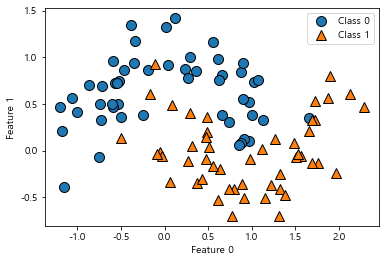

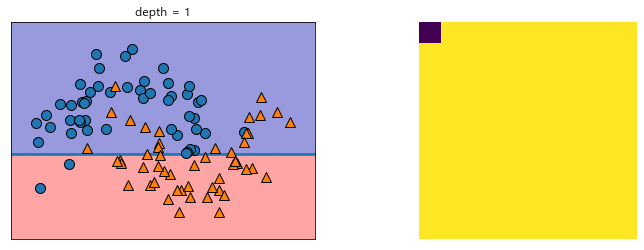

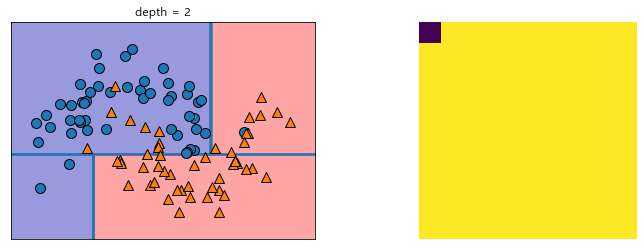

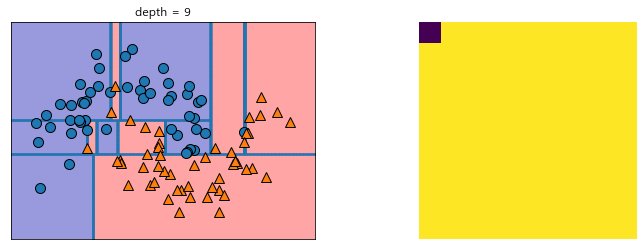

In [25]:
#graphviz를 설치하고 환경변수 설정을 해야 제대로 출력된다고 함.
mglearn.plots.plot_tree_progressive()

- 결정트리의 복잡도 제어

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [27]:
cancer= load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state = 0)

In [28]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8811188811188811


In [30]:
model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [31]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9929577464788732
0.9020979020979021


In [32]:
model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=0)

In [33]:
#결과가 점점 좋아지고 있음 위의 결과들 보다
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9647887323943662
0.9370629370629371


In [42]:
#아나콘다prompt 관리자권한으로 열어서 설치 !빼고 복붙
#!conda install python-graphviz


^C


In [39]:
from sklearn.tree import export_graphviz
import graphviz

import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [40]:
export_graphviz(model, out_file='tree.dot', class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

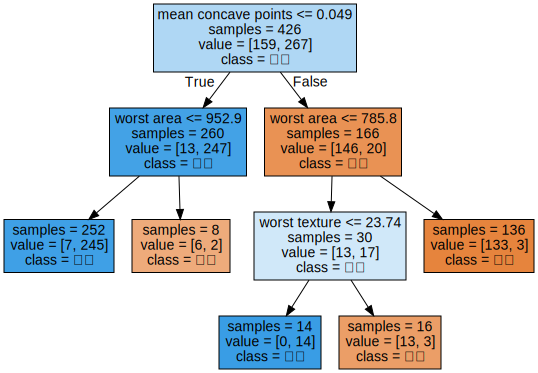

In [41]:
with open('tree.dot', encoding = "utf-8") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [58]:
#판단 근거를 알 수 있는 알고리즘:  화이트 박스
#(이 모델에서 사용한 적이 있는?)각 feature들의 중요도를 상대수치로 나타냄
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.81084146, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05733052, 0.        , 0.13182801, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [59]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [55]:
x=cancer["feature_names"]
y=model.feature_importances_

<BarContainer object of 30 artists>

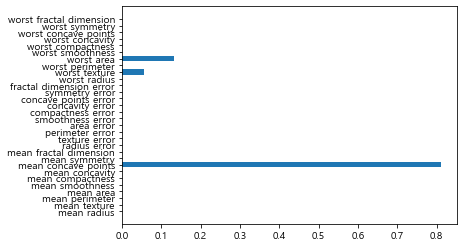

In [57]:
plt.barh(x,y)